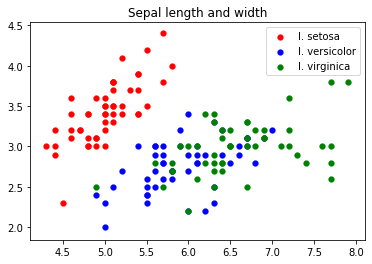

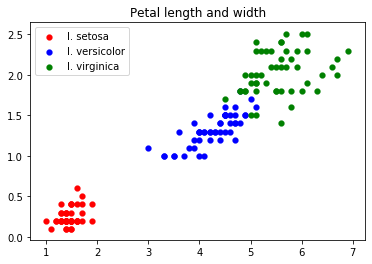

In [57]:
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
import numpy as np
# Load data into df and get unique labels
df = pd.read_csv("iris_data.csv")
species = df["Species"].unique()

def plot_data(leaf, plot):
    ax = plot.add_subplot(111)
    colors = ['r', 'b', 'g']

    # Adding dots of different colors for each species
    for spec, color in zip(species, colors):
        s = df[df["Species"] == spec]

        x = s[f"{leaf} length"]
        y = s[f"{leaf} width"]

        ax.scatter(x, y, c=color, linewidth=0.2)
    ax.set_title(f"{leaf} length and width")
    ax.legend(species)

plot_data("Sepal", plt.figure())
plot_data("Petal", plt.figure())
plt.show()

In [52]:
# use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate
# bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an
# argument: quantile set it to 0.2 for best result
def find_meanshift(leaf):
    data = df[[f"{leaf} length", f"{leaf} width"]]
    bandwidth = estimate_bandwidth(data, quantile=0.2)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    clusters = ms.cluster_centers_
    labels = ms.labels_
    number_clusters = len(clusters)
    return labels, clusters, number_clusters
    
for leaf in leaves:
    labels, clusters, number_clusters = find_meanshift(leaf)

    print(leaf, "\n ------------")
    print("number of clusters: ", number_clusters)
    print("Labels: \n", labels)
    print("Cluster centers:\n ", clusters)
    print("------------")

Sepal 
 ------------
number of clusters:  3
Labels: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0 0 2 1 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Cluster centers:
  [[6.08727273 2.90181818]
 [5.         3.37692308]
 [7.6        3.73333333]]
------------
Petal 
 ------------
number of clusters:  4
Labels: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 3 2 3 2 2 3 1 3 2 3 2
 2 2 2 2 2 2 3 3 1 2 2 3 1 2 3 1 1 2 2 3 3 2 1 2 3 2 2 1 2 2 2 2 3 2 2 2 2
 2 2]
Cluster centers:
  [[1.462      0.246     ]
 [4.74864865 1.58648649]
 [5.16666667 1.94      ]
 [6.6        2.06666667]]
------------


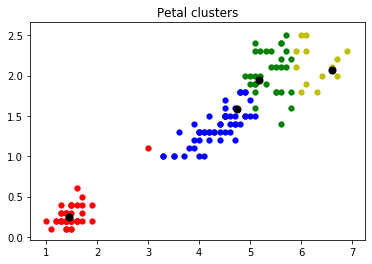

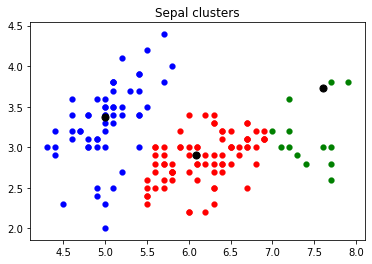

In [59]:
# create a new scatter plot where each flower is colored according to cluster label
# add a dot for the cluster centers

def plot_clusters(leaf, plot): 
    labels, clusters, number_clusters = find_meanshift(leaf)
    ax = plot.add_subplot(111)
    c = ['r', 'b', 'g', 'y']

    for clust, col in zip(range(number_clusters), c):
        center = clusters[clust]
        my_members = labels == clust
        data = df[[f"{leaf} length", f"{leaf} width"]].to_numpy()
        x, y = data[my_members, 0], data[my_members, 1]
        ax.scatter(x, y, c=col, linewidth=0.2)
        ax.scatter(center[0], center[1], c='k', s=50)
    ax.set_title(f"{leaf} clusters")

plot_clusters("Petal", plt.figure())
plot_clusters("Sepal", plt.figure())
plt.show()

Compare the 2 plots (colored by actual labels vs. colored by cluster label)

Petal: Petal has four clusters whereas I. virginica is divided into two clusters
Furthermore, some of the data points in the clusters are not from the same species

Sepal: There are three clusters bur the datapoints are way off

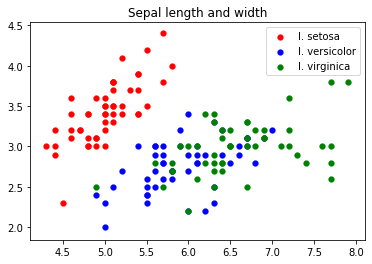

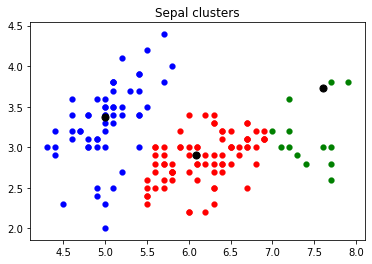

In [61]:
plot_data("Sepal", plt.figure())
plot_clusters("Sepal", plt.figure())
plt.show()

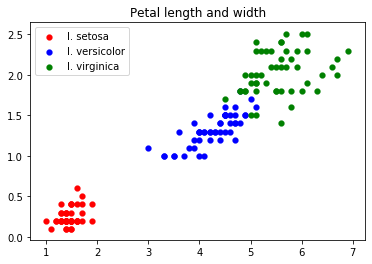

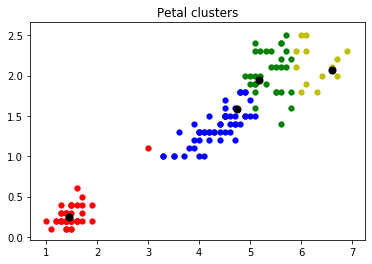

In [60]:
plot_data("Petal", plt.figure())
plot_clusters("Petal", plt.figure())
plt.show()